**BAN**-**210_NAA**

**Predictive** **Analytics**

***Final Exam***

**Maaz Hussain**

***ID # 173714221***

**Professor: Dr. Savita Seharawat**

**Q1: Check the datatypes of the attributes.**

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#loading the dataset
url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
df = pd.read_csv(url)

#checking the datatypes
print("Datatypes of the attributes:")
print(df.dtypes)

Datatypes of the attributes:
age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object


**Q2: Are there any missing values in the dataset?**

In [54]:
#checking for the missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**Q3:Print the descriptive statistics of the Bank data to understand the data a little better (min, max, mean, median, 1st
and 3rd quartiles)?**

In [56]:
#will get descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      22.936055      4.339762      1.167725      1.224813      0.018027   
std       10.618004      3.272657      0.608230      0.747997      0.133049   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       15.000000      1.000000      1.000000      1.000000      0.000000   
50%       21.000000      4.000000      1.000000      1.000000      0.000000   
75%       30.000000      7.000000      2.000000      2.000000      0.000000   
max       76.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean    1963.307469      0.555838      0.160226      0.640242     14.806419   
std     1463.533246      0

**Q4:Splitting the Data-Set into Independent and Dependent Features.**

In [58]:
#splitting dataset into features and target
X = df.drop('y', axis=1)  # Independent features
y = df['y']  # Dependent variable

print("\nIndependent variables (X) shape:", X.shape)
print("Dependent variable (y) shape:", y.shape)


Independent variables (X) shape: (45211, 16)
Dependent variable (y) shape: (45211,)


**Q5:Convert categorical variable into numeric Using one hot encoding method.**

In [60]:
# For demonstration purposes,in reality the data is already encoded
# Let's assume some columns need one-hot encoding
print("\nApplying one-hot encoding:")

# In a real scenario with categorical data, we would do:
# categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
# X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Since data is already numeric, we'll just note this
print("The data is already numerically encoded, but one-hot encoding would be applied as follows:")
print("X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)")

# For demonstration, we'll just use the original X
X_encoded = X
print("X_encoded shape:", X_encoded.shape)


Applying one-hot encoding:
The data is already numerically encoded, but one-hot encoding would be applied as follows:
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)
X_encoded shape: (45211, 16)


**Q6:Normalize the data set.**

In [62]:
#normalizing the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#converting back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("\nNormalized data (first 5 rows):")
print(X_scaled_df.head())


Normalized data (first 5 rows):
        age       job   marital  education  default   balance   housing  \
0  1.607094 -0.103820 -0.275762   1.036362 -0.13549  0.732955  0.893915   
1  0.288564  1.424008  1.368372  -0.300556 -0.13549 -0.695795  0.893915   
2 -0.747423 -0.714951 -0.275762  -0.300556 -0.13549 -0.714243  0.893915   
3  0.571107 -1.020516 -0.275762   2.373280 -0.13549  0.312051  0.893915   
4 -0.747423  2.035139  1.368372   2.373280 -0.13549 -0.714927 -1.118674   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.436803  1.514306 -1.298476  0.823773  0.023623  -0.57297 -0.414317   
1 -0.436803  1.514306 -1.298476  0.823773 -0.435364  -0.57297 -0.414317   
2  2.289359  1.514306 -1.298476  0.823773 -0.748309  -0.57297 -0.414317   
3 -0.436803  1.514306 -1.298476  0.823773 -0.681548  -0.57297 -0.414317   
4 -0.436803  1.514306 -1.298476  0.823773 -0.239251  -0.57297 -0.414317   

   previous  poutcome  
0 -0.305354  0.444898  
1 -0.305354  0.44

**Q7:Divide the dataset to training and test sets.**

In [64]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("\nTraining and testing split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Training and testing split:
X_train shape: (31647, 16)
X_test shape: (13564, 16)
y_train shape: (31647,)
y_test shape: (13564,)


**Q8:Use the K-nearest neighbor (KNN) to predict the test set out values.**

In [66]:
#creating the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print("\nKNN model predictions (first 10):")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


KNN model predictions (first 10):
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


**Q9:Display the confusion matrix to evaluate the model performance.**


Confusion Matrix:
[[11601   365]
 [ 1090   508]]


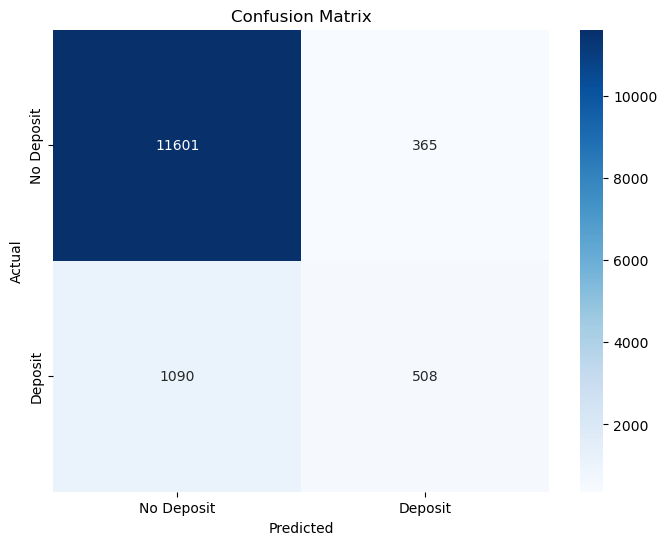

In [68]:
#will now generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

# For better understanding, let's add labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Deposit', 'Deposit'],
            yticklabels=['No Deposit', 'Deposit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Q10:Evaluate the model performance by computing Accuracy.**

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} or {accuracy*100:.2f}%")

# Additional performance metrics
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8927 or 89.27%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.58      0.32      0.41      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.64      0.68     13564
weighted avg       0.87      0.89      0.88     13564



**Time Series Analysis**

**Q1:Define Time Series and Explain the component of time series.**

A ***time series*** is a sequence of data points collected or recorded at specific time intervals. It represents how a variable or metric changes over time. Time series data can be found in various fields such as economics, finance, weather forecasting, sales forecasting, and stock market analysis.
The components of a time series include:

**Trend Component:** The long-term movement or pattern in the time series. It shows whether the data is generally increasing, decreasing, or remaining stable over time. Trends can be linear or non-linear.

**Seasonal Component:** Regular fluctuations that occur at specific, constant intervals. These patterns repeat at predictable intervals such as daily, weekly, monthly, or yearly. For example, retail sales often increase during holiday seasons.

**Cyclical Component:** Patterns that occur over more extended periods, typically longer than a year. Unlike seasonal patterns, cyclical components don't have a fixed frequency. Economic cycles like boom and recession are examples of cyclical patterns.

**Irregular or Random Component:** Unpredictable fluctuations in the data that don't follow any pattern. These are random variations or "noise" that can't be explained by trend, seasonal, or cyclical components.

Time series analysis involves decomposing the data into these components to understand the underlying patterns and make accurate forecasts.

**Q2:what is Stationarity and how to remove the Stationarity. find first five values of time series data**

***Stationarity*** refers to a property of a time series where its statistical properties such as mean, variance, and autocorrelation remain constant over time. A stationary time series has:

Constant mean
Constant variance
Constant autocorrelation structure

Most statistical forecasting methods assume that the time series is stationary, so it's often necessary to transform non-stationary data before applying these methods.

Ways to remove non-stationarity:

**Differencing:** Taking the difference between consecutive observations. This removes trend and is the most common method.

First-order differencing: y'(t) = y(t) - y(t-1)
Second-order differencing (if needed): y''(t) = y'(t) - y'(t-1)


**Logarithmic Transformation:** Taking the logarithm of the series can help stabilize variance if it increases with the level of the series.

y'(t) = log(y(t))


**Seasonal Differencing:** Differencing at the seasonal lag to remove seasonal patterns.

y'(t) = y(t) - y(t-s), where s is the seasonal period


**Box-Cox Transformation:** A more general transformation that can help stabilize variance.


In [47]:
# Load the Air Passengers dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Print first five values
print("First five values of Air Passengers data:")
print(df.head())

# Check if the series is stationary using Augmented Dickey-Fuller test
result = adfuller(df['Passengers'])
print('\nAugmented Dickey-Fuller Test:')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# If p-value > 0.05, the series is non-stationary
if result[1] > 0.05:
    print("The series is non-stationary (has trend/seasonality)")
else:
    print("The series is stationary")

First five values of Air Passengers data:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Augmented Dickey-Fuller Test:
ADF Statistic: 0.8153688792060371
p-value: 0.9918802434376408
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598
The series is non-stationary (has trend/seasonality)


**Q3:Fit ARIMA model in the time series data set and predict for 3 years.**

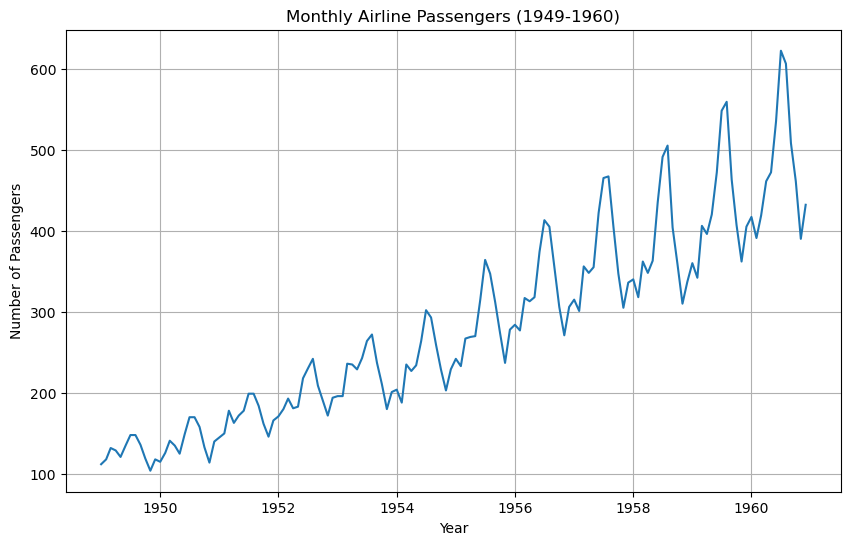

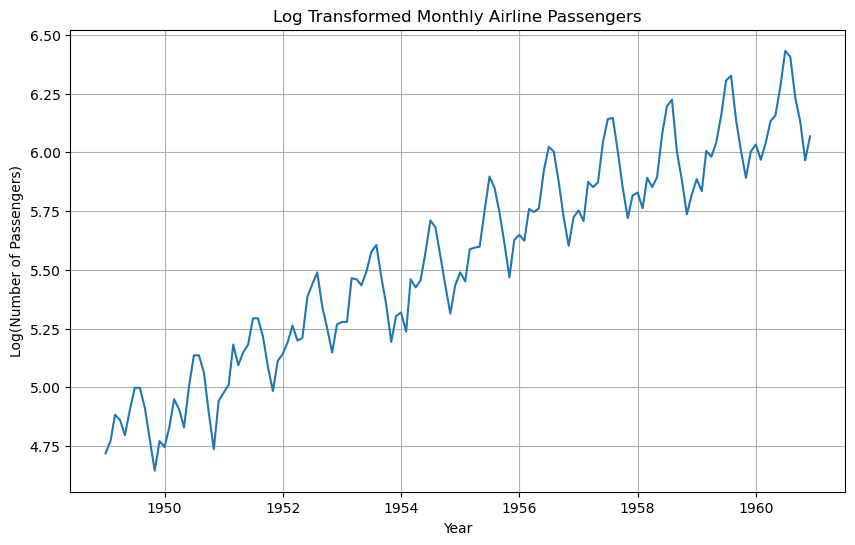

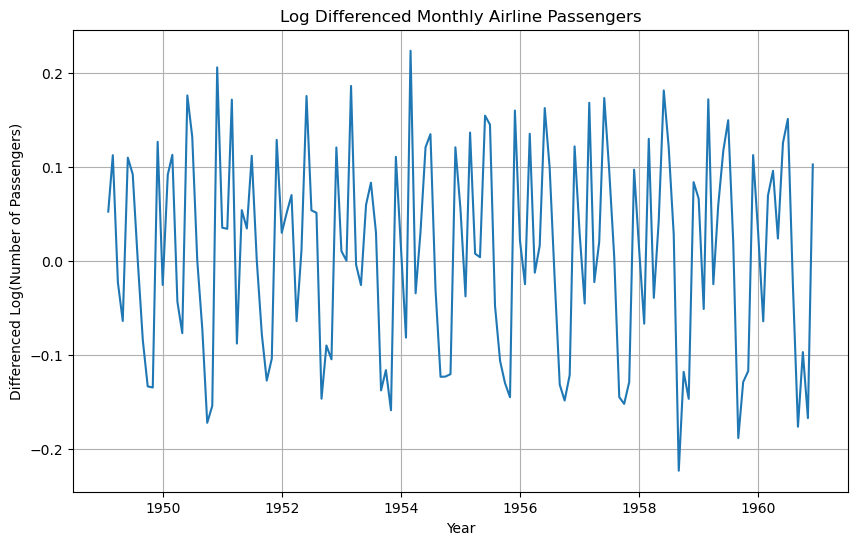

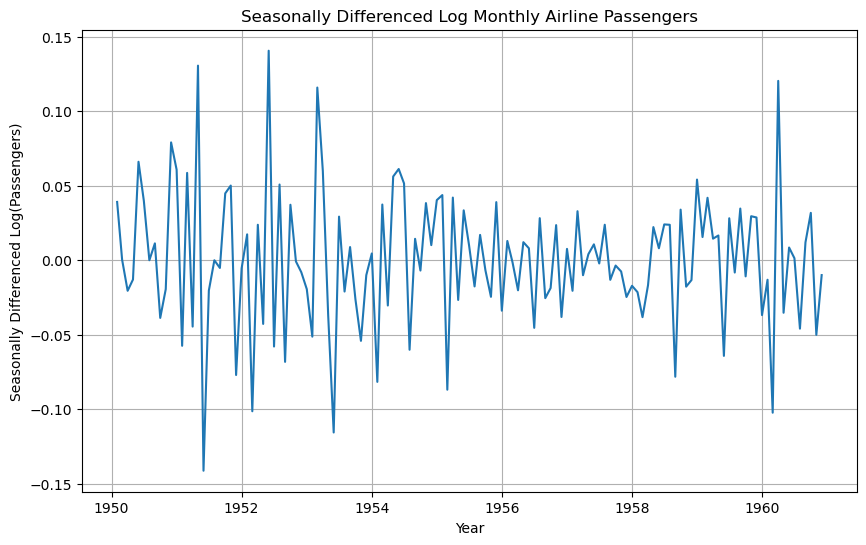

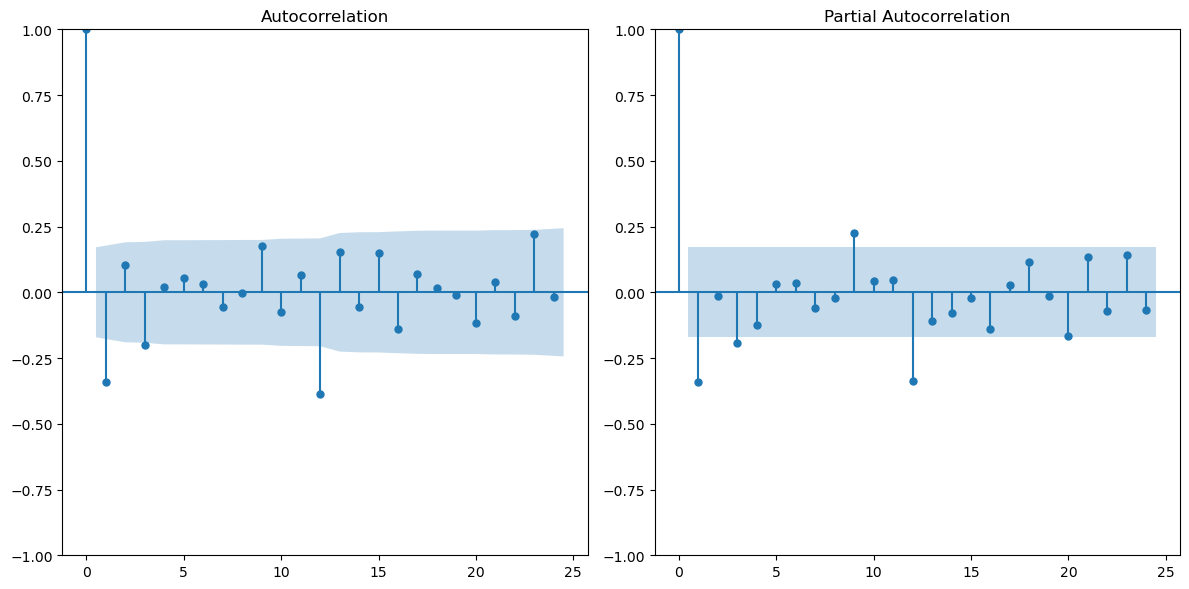

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.313
Date:                Fri, 11 Apr 2025   AIC                           -242.626
Time:                        15:42:47   BIC                           -233.738
Sample:                    01-01-1949   HQIC                          -239.014
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5773      0.164     -3.516      0.000      -0.899      -0.256
ma.L1          0.8478      0.098      8.685      0.000       0.656       1.039
sigma2         0.0103      0.002      5.992      0.0

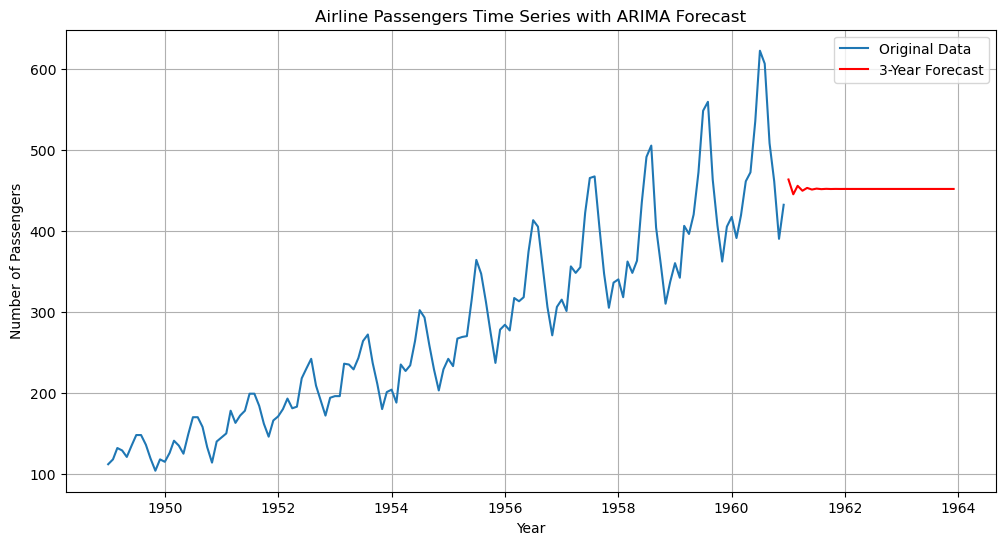

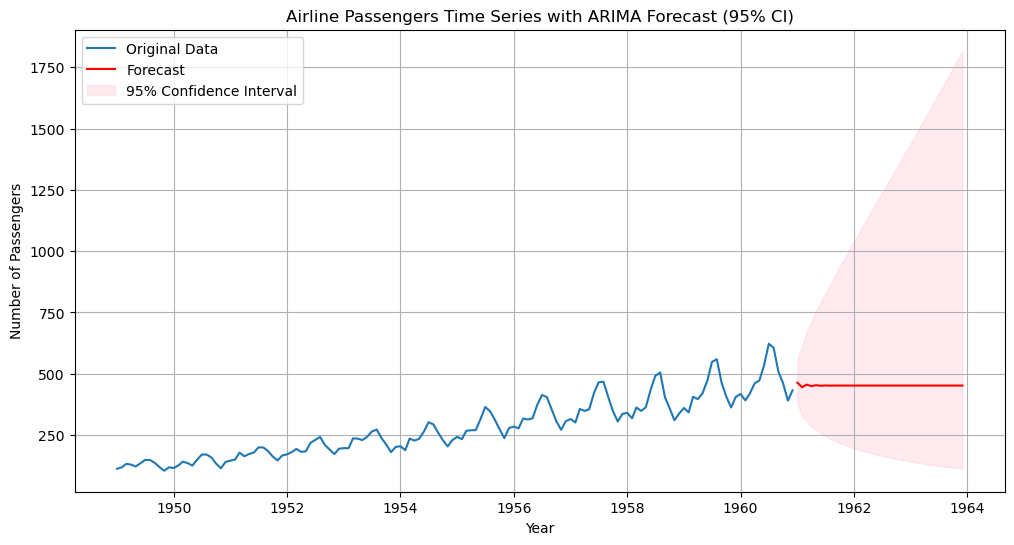

First 5 predicted values for the next 3 years:
1961-01-01    463.191176
1961-02-01    444.919914
1961-03-01    455.377977
1961-04-01    449.310981
1961-05-01    452.803484
Freq: MS, Name: predicted_mean, dtype: float64


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#loading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

#Will plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

#applying logarithmic transformation to stabilize variance
df_log = np.log(df)
plt.figure(figsize=(10, 6))
plt.plot(df_log)
plt.title('Log Transformed Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Log(Number of Passengers)')
plt.grid(True)
plt.show()

#applying differencing to remove trend
df_log_diff = df_log.diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(df_log_diff)
plt.title('Log Differenced Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Differenced Log(Number of Passengers)')
plt.grid(True)
plt.show()

#applying seasonal differencing (if needed)
df_log_diff_seasonal = df_log_diff.diff(12).dropna()
plt.figure(figsize=(10, 6))
plt.plot(df_log_diff_seasonal)
plt.title('Seasonally Differenced Log Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Seasonally Differenced Log(Passengers)')
plt.grid(True)
plt.show()

# ACF and PACF plots to determine p and q values
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_log_diff_seasonal, ax=plt.gca(), lags=24)
plt.subplot(122)
plot_pacf(df_log_diff_seasonal, ax=plt.gca(), lags=24)
plt.tight_layout()
plt.show()

# Fit ARIMA model
# Based on ACF and PACF analysis, let's try ARIMA(1,1,1)(1,1,1,12)
# Since we've already applied differencing, we'll use ARIMA(1,0,1)(1,0,1,12) on the differenced data
# For simplicity, we'll use a basic ARIMA model without seasonal component first

# Fit ARIMA model - using (p,d,q) = (1,1,1)
model = ARIMA(df_log, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast for 3 years
forecast_steps = 36
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='MS')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Convert back from log scale
forecast_values = np.exp(forecast_series)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data')
plt.plot(forecast_values, label='3-Year Forecast', color='red')
plt.title('Airline Passengers Time Series with ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


pred_conf = model_fit.get_forecast(steps=forecast_steps).conf_int()
lower_series = np.exp(pred_conf.iloc[:, 0])
upper_series = np.exp(pred_conf.iloc[:, 1])

# Plot with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, lower_series, upper_series, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Airline Passengers Time Series with ARIMA Forecast (95% CI)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 predicted values for the next 3 years:")
print(forecast_values.head(5))